In [ ]:
# !pip install seaborn

In [161]:
import os
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [162]:
!ls ./../../data/blueberry_yield_pred

sample_submission.csv test.csv              train.csv


In [163]:
### Data Preparation and EDA

In [164]:
train_df=pd.read_csv('./../../data/blueberry_yield_pred/train.csv')
test_df=pd.read_csv('./../../data/blueberry_yield_pred/test.csv')

In [165]:
train_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [166]:
train_df.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [167]:
test_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [168]:
print(train_df.shape)
print(test_df.shape)

(15289, 18)
(10194, 17)


In [169]:
### Plots

In [170]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

<Axes: >

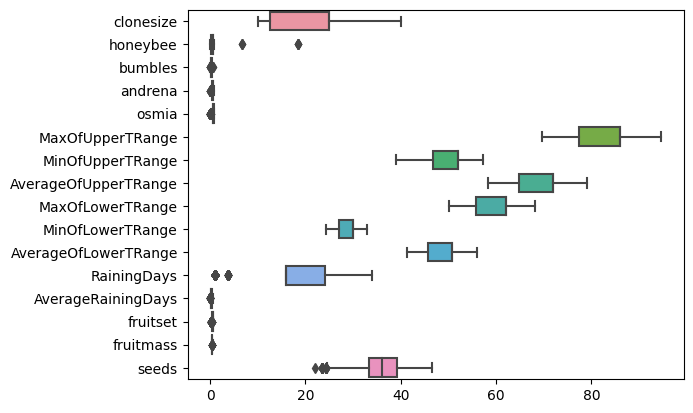

In [171]:
sns.boxplot(data=train_df[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange',
                      'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange',
                      'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass',
                      'seeds']], orient="h")

In [172]:
#### Remove outliers
from scipy import stats
train_df_nor = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]

<Axes: >

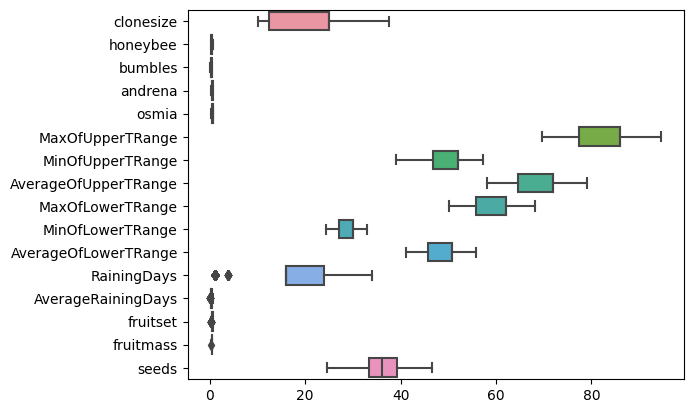

In [173]:
sns.boxplot(data=train_df_nor[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange',
                      'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange',
                      'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass',
                      'seeds']], orient="h")

In [174]:
train_df_nor.shape

(15144, 18)

In [175]:
train_df2 = train_df[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield']]

df2 = train_df2.corr()[["yield"]].reset_index()
df2.columns = ["feature", "corr"]
df2.head(25)

,feature,corr
0,clonesize,-0.382619
1,honeybee,-0.118001
2,bumbles,0.161145
3,andrena,0.073969
4,osmia,0.198264
5,MaxOfUpperTRange,-0.022517
6,MinOfUpperTRange,-0.021929
7,AverageOfUpperTRange,-0.021940
8,MaxOfLowerTRange,-0.022197
9,MinOfLowerTRange,-0.022319


In [176]:
### Data Split

In [177]:
X = train_df_nor[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange',
                      'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange',
                      'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass',
                      'seeds']]
Y = train_df_nor['yield'].to_list()

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [179]:
####### Model Training

In [180]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

In [181]:
### Decision Tree

In [182]:
dtr = tree.DecisionTreeRegressor(criterion="absolute_error", max_depth=6, random_state=1)

In [183]:
dtr = dtr.fit(X_train, y_train)
# dtr_scores = cross_val_score(dtr, X_train, y_train, cv=10)

In [184]:
y_pred = dtr.predict(X_test)
print(f'MAE of Decision Tree: {mean_absolute_error(y_test, y_pred)}')
print(f'MAPE of Decision Tree: {mean_absolute_percentage_error(y_test, y_pred)}')
# print(dtr_scores)

MAE of Decision Tree: 344.7506305480357
MAPE of Decision Tree: 0.058993780530598026


In [185]:
### Random Forest

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
rfr = RandomForestRegressor(n_estimators=250, max_depth=9, criterion="absolute_error", oob_score=True, random_state=42)
rfr.fit(X_train, np.array(y_train))
y_pred_rf_250 = rfr.predict(X_test)
print(f'MAE of Random Forest: {mean_absolute_error(y_test, y_pred_rf_250)}') #MAE
print(f'MAPE of Random Forest: {mean_absolute_percentage_error(y_test, y_pred_rf_250)}') #MAPE

MAE of Random Forest: 337.22975419542405
MAPE of Random Forest: 0.05784658926895946


In [192]:
### XGBoost

In [193]:
from sklearn import ensemble

In [194]:
params = {
    "n_estimators": 1300,
    "max_depth": 8,
    "min_samples_split": 2,
    "learning_rate": 0.01,
    "loss": "absolute_error",
}

In [195]:
xgb_reg = ensemble.GradientBoostingRegressor(**params, random_state=1)
xgb_reg.fit(X_train, y_train)
# xgb_reg_score=cross_val_score(xgb_reg, X_train, y_train,cv=10)

GradientBoostingRegressor(learning_rate=0.01, loss='absolute_error',
                          max_depth=8, n_estimators=1300, random_state=1)

In [196]:
y_pred_xgb = xgb_reg.predict(X_test)
print(f' MAE of XGBoost: {mean_absolute_error(y_test, y_pred_xgb)}')
print(f' MAPE of XGBoost: {mean_absolute_percentage_error(y_test, y_pred_xgb)}')

 MAE of XGBoost: 338.09466325877077
 MAPE of XGBoost: 0.05781759719545919


In [197]:
#### Inference

In [198]:
sample_format=pd.read_csv('./../../data/blueberry_yield_pred/sample_submission.csv')

In [199]:
sample_format.head()

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194
4,15293,6025.194


In [200]:
test_df.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [201]:
test_df1 = test_df[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]

In [202]:
test_df1_id = test_df['id'].to_list()

In [203]:
test_pred = list(rfr.predict(test_df1))

In [204]:
out_df = pd.DataFrame(list(zip(test_df1_id, test_pred)), columns = ['id', 'yield'])

In [205]:
out_df.tail()

,id,yield
10189,25478,5421.922538
10190,25479,5636.798108
10191,25480,6481.141367
10192,25481,4379.983677
10193,25482,7259.345451


In [206]:
out_df.to_csv("rf_output_v3.csv", index=False)

In [207]:
### Hyperparameter Tuning and Ensemble Technique

In [208]:
list1 = []
for score, name in zip(rfr.feature_importances_,X_train.columns):
    list1.append((round(score,5),name))

In [209]:
print(sorted(list1)[::-1])

[(0.76702, 'fruitset'), (0.18888, 'seeds'), (0.02058, 'fruitmass'), (0.00313, 'andrena'), (0.00307, 'osmia'), (0.00285, 'AverageRainingDays'), (0.00261, 'RainingDays'), (0.00173, 'MaxOfLowerTRange'), (0.00169, 'MinOfUpperTRange'), (0.00145, 'clonesize'), (0.00138, 'AverageOfLowerTRange'), (0.0013, 'honeybee'), (0.00119, 'bumbles'), (0.00111, 'AverageOfUpperTRange'), (0.00104, 'MinOfLowerTRange'), (0.00096, 'MaxOfUpperTRange')]


In [210]:
df1 = pd.DataFrame(list(zip(X_train.columns, rfr.feature_importances_)), columns = ['feature', 'feature_imp'])

In [211]:
df1.head(25)

,feature,feature_imp
0,clonesize,0.001450
1,honeybee,0.001302
2,bumbles,0.001191
3,andrena,0.003130
4,osmia,0.003072
5,MaxOfUpperTRange,0.000961
6,MinOfUpperTRange,0.001692
7,AverageOfUpperTRange,0.001109
8,MaxOfLowerTRange,0.001734
9,MinOfLowerTRange,0.001039


In [212]:
df3 = pd.merge(df1, df2, on="feature", how="inner")

In [213]:
df3.sort_values('feature_imp', ascending=False).head(25)

,feature,feature_imp,corr
13,fruitset,0.767020,0.885967
15,seeds,0.188880,0.868853
14,fruitmass,0.020583,0.826481
3,andrena,0.003130,0.073969
4,osmia,0.003072,0.198264
12,AverageRainingDays,0.002855,-0.483870
11,RainingDays,0.002607,-0.477191
8,MaxOfLowerTRange,0.001734,-0.022197
6,MinOfUpperTRange,0.001692,-0.021929
0,clonesize,0.001450,-0.382619


In [237]:
### Random Forest and XGB Ensemble

thres_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
result_list= []
for thres in thres_list:
    weighted_rf_xbg_pred = [((thres*i)+((1-thres)*j)) for i, j in zip(y_pred_rf_250, y_pred_xgb)]
    print(f' MAPE of Ensemble with threshold: {thres, mean_absolute_percentage_error(y_test, weighted_rf_xbg_pred)}')
    result_list.append(mean_absolute_percentage_error(y_test, weighted_rf_xbg_pred))
    
combined_result_list =  pd.DataFrame(list(zip(thres_list, result_list)), columns = ['thres', 'MAE'])
print('\n\n\n')
print(combined_result_list.sort_values(by=['MAE']).head(1))

 MAPE of Ensemble with threshold: (0, 0.05781759719545919)
 MAPE of Ensemble with threshold: (0.1, 0.05767696243570819)
 MAPE of Ensemble with threshold: (0.2, 0.05757321445511271)
 MAPE of Ensemble with threshold: (0.3, 0.05749834848512959)
 MAPE of Ensemble with threshold: (0.4, 0.05746045863191918)
 MAPE of Ensemble with threshold: (0.5, 0.05745315669910563)
 MAPE of Ensemble with threshold: (0.6, 0.05747376795889673)
 MAPE of Ensemble with threshold: (0.7, 0.0575146755560182)
 MAPE of Ensemble with threshold: (0.8, 0.057587641598082655)
 MAPE of Ensemble with threshold: (0.9, 0.057698843830827476)
 MAPE of Ensemble with threshold: (1, 0.05784658926895946)




   thres       MAE
5    0.5  0.057453


In [238]:
### Decision Tree and XGB Ensemble

thres_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
result_list_dt = []
for thres in thres_list:
    weighted_dt_xbg_pred = [((thres*i)+((1-thres)*j)) for i, j in zip(y_pred, y_pred_xgb)]
    print(f' MAPE of Ensemble with threshold: {thres, mean_absolute_percentage_error(y_test, weighted_dt_xbg_pred)}')
    result_list_dt.append(mean_absolute_percentage_error(y_test, weighted_rf_xbg_pred))
    
combined_result_list_dt =  pd.DataFrame(list(zip(thres_list, result_list_dt)), columns = ['thres', 'MAE'])
print('\n\n\n')
print(combined_result_list_dt.sort_values(by=['MAE']).head(1))

 MAPE of Ensemble with threshold: (0, 0.05781759719545919)
 MAPE of Ensemble with threshold: (0.1, 0.05762937266159877)
 MAPE of Ensemble with threshold: (0.2, 0.0575195082473523)
 MAPE of Ensemble with threshold: (0.3, 0.05746912245791289)
 MAPE of Ensemble with threshold: (0.4, 0.057473720367003676)
 MAPE of Ensemble with threshold: (0.5, 0.057556813118292686)
 MAPE of Ensemble with threshold: (0.6, 0.05772354712405735)
 MAPE of Ensemble with threshold: (0.7, 0.05794153487825294)
 MAPE of Ensemble with threshold: (0.8, 0.05822509191516154)
 MAPE of Ensemble with threshold: (0.9, 0.05857321455171656)
 MAPE of Ensemble with threshold: (1, 0.058993780530598026)




   thres       MAE
0    0.0  0.057847
